# Data Preparation

In [40]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Common functions

In [41]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1),
                       name ='W')

In [42]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape)
                       , name = 'b')

In [43]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], 
                        padding='SAME')

In [44]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], 
                          padding='SAME')

# Input Layer

In [45]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float",shape=[None, 784]
                       ,name="x")    
    x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolutional Layer 1

In [46]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1=conv2d(x_image, W1)+ b1
    C1_Conv = tf.nn.relu(Conv1 )

In [47]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

# Convolutional Layer 2

In [48]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2=conv2d(C1_Pool, W2)+ b2
    C2_Conv = tf.nn.relu(Conv2)

In [49]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv) 

# Fully Connected Layer

In [50]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

In [51]:
with tf.name_scope('D_Hidden_Layer'):
    W3= weight([1764, 128])
    b3= bias([128])
    D_Hidden = tf.nn.relu(
                  tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout= tf.nn.dropout(D_Hidden, 
                                keep_prob=0.8)

# Output Layer

In [52]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict= tf.nn.softmax(
                 tf.matmul(D_Hidden_Dropout,
                           W4)+b4)

# Training Model Optimization

In [53]:
with tf.name_scope("optimizer"):
    
    y_label = tf.placeholder("float", shape=[None, 10], 
                              name="y_label")
    
    loss_function = tf.reduce_mean(
                      tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001) \
                    .minimize(loss_function)

# Evaluation Model 

In [54]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1),
                                  tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Training Model

In [55]:
trainEpochs = 30
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [56]:
for epoch in range(trainEpochs):

    
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)         

Train Epoch: 01 Loss= 1.658575177  Accuracy= 0.8192
Train Epoch: 02 Loss= 1.543257475  Accuracy= 0.9282
Train Epoch: 03 Loss= 1.521682858  Accuracy= 0.949
Train Epoch: 04 Loss= 1.508304477  Accuracy= 0.96
Train Epoch: 05 Loss= 1.504441142  Accuracy= 0.9612
Train Epoch: 06 Loss= 1.500851035  Accuracy= 0.9642
Train Epoch: 07 Loss= 1.496485710  Accuracy= 0.968
Train Epoch: 08 Loss= 1.491347075  Accuracy= 0.973
Train Epoch: 09 Loss= 1.489483833  Accuracy= 0.9752
Train Epoch: 10 Loss= 1.489060163  Accuracy= 0.975
Train Epoch: 11 Loss= 1.484564543  Accuracy= 0.9796
Train Epoch: 12 Loss= 1.483177304  Accuracy= 0.9798
Train Epoch: 13 Loss= 1.484310389  Accuracy= 0.9788
Train Epoch: 14 Loss= 1.480118990  Accuracy= 0.9834
Train Epoch: 15 Loss= 1.480761290  Accuracy= 0.9816
Train Epoch: 16 Loss= 1.480714679  Accuracy= 0.9816
Train Epoch: 17 Loss= 1.480393767  Accuracy= 0.9812
Train Epoch: 18 Loss= 1.479297280  Accuracy= 0.9832
Train Epoch: 19 Loss= 1.478613615  Accuracy= 0.9848
Train Epoch: 20 Lo

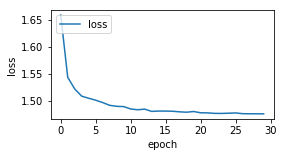

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

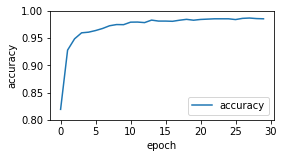

In [58]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


# Evaluate Model Accuracy

In [59]:
len(mnist.test.images)

10000

In [60]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images,
                                   y_label: mnist.test.labels}))

Accuracy: 0.988


In [61]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images[:5000],
                                   y_label: mnist.test.labels[:5000]}))


Accuracy: 0.9822


In [62]:
print("Accuracy:", 
      sess.run(accuracy,feed_dict={x: mnist.test.images[5000:],
                                   y_label: mnist.test.labels[5000:]}))

Accuracy: 0.9936


# Predict Probability

In [63]:
y_predict=sess.run(y_predict, 
                   feed_dict={x: mnist.test.images[:5000]})

In [64]:
y_predict[:6]

array([[  1.98674331e-15,   2.40843760e-16,   6.68768670e-16,
          9.18272836e-13,   3.32307088e-23,   3.05963944e-16,
          2.33023737e-30,   1.00000000e+00,   6.61328719e-21,
          4.87112737e-13],
       [  1.26385035e-12,   1.53843521e-10,   1.00000000e+00,
          3.88882885e-16,   6.31828232e-25,   4.87540718e-19,
          5.42992334e-15,   4.38110072e-20,   7.69477552e-17,
          3.62791877e-28],
       [  1.03760976e-11,   9.99945641e-01,   5.92294103e-10,
          3.36629113e-10,   5.30696452e-05,   1.72650366e-10,
          3.83691079e-09,   1.28314377e-06,   5.29116617e-09,
          3.51198004e-09],
       [  9.99998450e-01,   4.05150928e-07,   2.33538245e-07,
          3.56811858e-10,   1.88900970e-07,   7.05107630e-12,
          1.14381482e-08,   7.03808098e-07,   9.65885261e-10,
          1.59294022e-09],
       [  6.42454307e-17,   1.59073674e-11,   1.16081643e-16,
          2.66784793e-18,   1.00000000e+00,   1.27646603e-14,
          2.99935505e-13

# Prediction

In [65]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images ,
                                      y_label: mnist.test.labels})

In [66]:
prediction_result[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4])

In [67]:
import numpy as np
def show_images_labels_predict(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    for i in range(0, 20):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[i],(28, 28)), 
                  cmap='binary')
        ax.set_title("label=" +str(np.argmax(labels[i]))+
                     ",predict="+str(prediction_result[i])
                     ,fontsize=9) 
    plt.show()

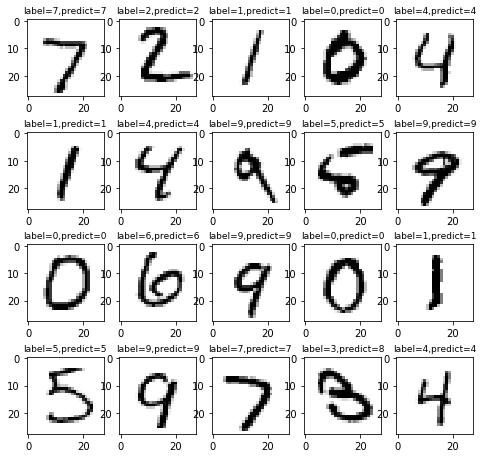

In [68]:
show_images_labels_predict(mnist.test.images,mnist.test.labels,prediction_result)

# error samples

In [69]:
for i in range(500):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=18   label= 3 predict= 8
i=149   label= 2 predict= 8
i=247   label= 4 predict= 6
i=320   label= 9 predict= 7
i=340   label= 5 predict= 3
i=449   label= 3 predict= 5


In [70]:
def show_images_labels_predict_error(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    i=0;j=0
    while i<20:
        if prediction_result[j]!=np.argmax(labels[j]):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(np.reshape(images[j],(28, 28)), 
                      cmap='binary')
            ax.set_title("j="+str(j)+
                         ",l=" +str(np.argmax(labels[j]))+
                         ",p="+str(prediction_result[j])
                         ,fontsize=9) 
            i=i+1  
        j=j+1
    plt.show()

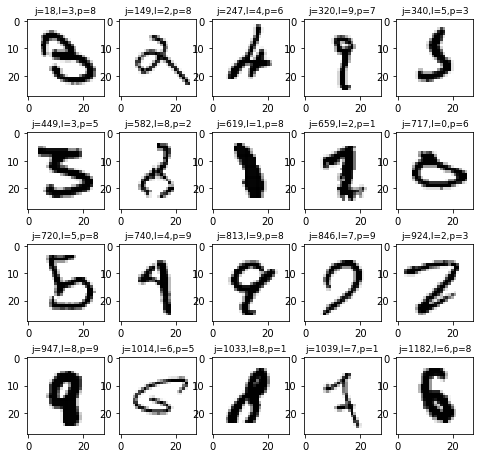

In [71]:
show_images_labels_predict_error(mnist.test.images,mnist.test.labels,prediction_result)

In [72]:
saver = tf.train.Saver()

In [73]:
save_path = saver.save(sess, "saveModel/CNN_model1")

In [74]:
print("Model saved in file: %s" % save_path)

Model saved in file: saveModel/CNN_model1


In [75]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN',sess.graph)

In [37]:
#sess.close()